arima  
1.정상성 확보 (평균,분산,공분산이 시간 t에 대해 동일.. 추세,계절,순환 등 패턴 없어야함 ) 따라서 차분을 통해 정상성을 학보한다
모
2. 모형 식별 acf(자기상관함수: 정상 시계열은 빠르게 0에 수렴,, 패턴) 와 pacf(편자기상관함수 시차에 따른 일련의 편자기 상관이다 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타냄 )를 통해 최적의 모형 식별
ar모형(자기회기모형)은 acf가 지속적으로 작아지며 처음 p개의 pacf값이 지속적으로 작아진다 
따라서 아리마 모형은 acf pacf 모두 지속적으로 작아지는 패턴을 보인다.

In [31]:
import pandas as pd

# 데이터 파일 경로
file_path = '빅데이터 최종데이터_1.csv'

In [32]:
data = pd.read_csv(file_path, encoding='cp949')
data.head() 

,일시,평균해면기압(hPa),평균기온(℃),최고기온 평균(℃),강수량(mm),평균상대습도(%),평균풍속(m/s),합계전천일사량(MJ/㎡),CPI,최대풍속계급,가격
0,2000-01,1027.6,0.0,4.5,40.7,77,2.5,311.37,62.456,6,1166
1,2000-02,1024.7,-0.4,5.0,5.6,69,2.7,414.30,62.647,6,1197
2,2000-03,1020.2,6.2,12.7,24.7,72,2.7,533.61,62.962,6,1332
3,2000-04,1014.9,11.5,17.8,40.1,71,2.7,606.17,62.709,6,1753
4,2000-05,1012.5,16.8,23.0,61.2,82,2.2,639.46,62.393,5,1526


In [33]:
# '일시' 열을 datetime 타입으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 데이터 타입 확인
print(data.dtypes)

# 결측치 확인
print(data.isnull().sum())

# 결측치 제거 (필요한 경우)
data.dropna(subset=['가격'], inplace=True)

일시               datetime64[ns]
평균해면기압(hPa)             float64
평균기온(℃)                 float64
최고기온 평균(℃)              float64
강수량(mm)                 float64
평균상대습도(%)                 int64
평균풍속(m/s)               float64
합계전천일사량(MJ/㎡)           float64
CPI                     float64
최대풍속계급                    int64
가격                        int64
dtype: object
일시               0
평균해면기압(hPa)      0
평균기온(℃)          0
최고기온 평균(℃)       0
강수량(mm)          0
평균상대습도(%)        0
평균풍속(m/s)        0
합계전천일사량(MJ/㎡)    0
CPI              0
최대풍속계급           0
가격               0
dtype: int64


In [34]:
# '일시' 열을 datetime 타입으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 데이터 타입 확인 및 결측치 처리
data_types = data.dtypes
null_values = data.isnull().sum()

# 결측치 제거 (가격 데이터에 대해)
data.dropna(subset=['가격'], inplace=True)

data_types, null_values


(일시               datetime64[ns]
 평균해면기압(hPa)             float64
 평균기온(℃)                 float64
 최고기온 평균(℃)              float64
 강수량(mm)                 float64
 평균상대습도(%)                 int64
 평균풍속(m/s)               float64
 합계전천일사량(MJ/㎡)           float64
 CPI                     float64
 최대풍속계급                    int64
 가격                        int64
 dtype: object,
 일시               0
 평균해면기압(hPa)      0
 평균기온(℃)          0
 최고기온 평균(℃)       0
 강수량(mm)          0
 평균상대습도(%)        0
 평균풍속(m/s)        0
 합계전천일사량(MJ/㎡)    0
 CPI              0
 최대풍속계급           0
 가격               0
 dtype: int64)

ADF Statistic: -2.286213
p-value: 0.176453
                               SARIMAX Results                                
Dep. Variable:                     가격   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2357.507
Date:                Thu, 06 Jun 2024   AIC                           4721.015
Time:                        11:35:08   BIC                           4732.035
Sample:                    01-01-2000   HQIC                          4725.429
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2418      0.078     -3.088      0.002      -0.395      -0.088
ma.L1          0.7516      0.072     10.412      0.000       0.610       0.893
sigma2   

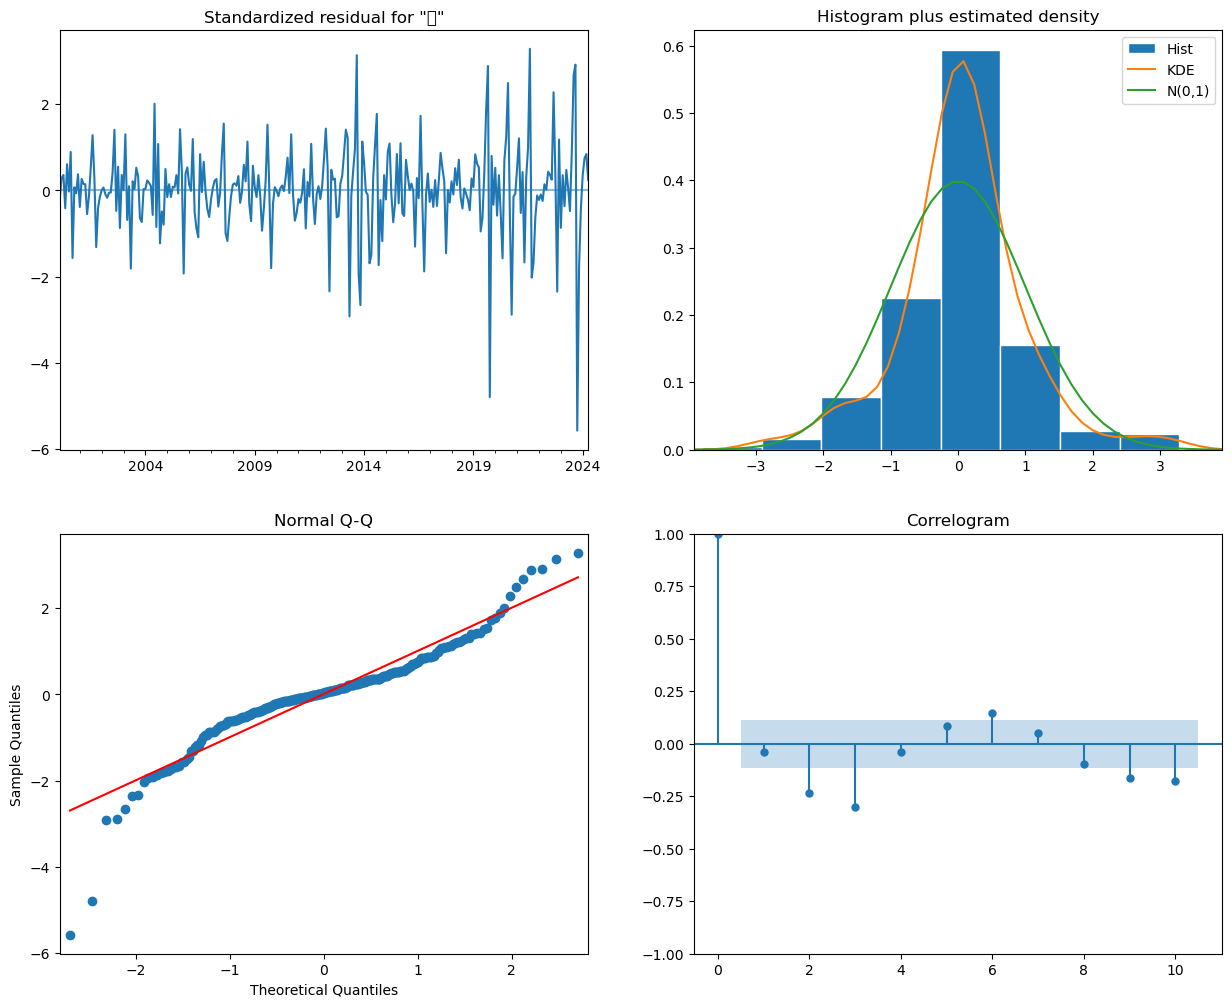

In [35]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 시계열 데이터 설정
time_series = data.set_index('일시')['가격']

# ADF-Test 실행
result = adfuller(time_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# ARIMA 모델 적합
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# 요약 정보 출력
print(model_fit.summary())

# 모델의 적합도 검사
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


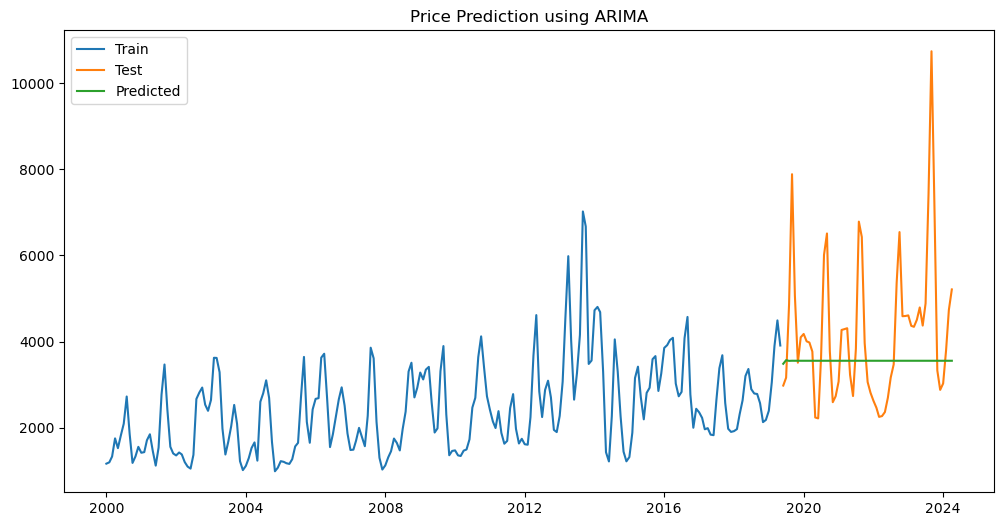

Mean Absolute Error:  1230.80456279564
Root Mean Squared Error:  1751.9883851926481


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# 데이터 분할
train_size = int(len(time_series) * 0.8)
train, test = time_series[0:train_size], time_series[train_size:]

# 모델 재적합
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# 예측
predictions = model_fit.forecast(steps=len(test))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Price Prediction using ARIMA')
plt.show()

# 정확도 평가
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))

print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)


위 잔차를 보면 말도안되는 숫작 나옴 그래서 오토 아리마를 이용해서 자동 매개변수 조정예정

ARIMA(0, 1, 0) - AIC:3706.6998551839592
ARIMA(0, 1, 1) - AIC:3656.3274669834086
ARIMA(0, 1, 2) - AIC:3635.8076109954927
ARIMA(0, 1, 3) - AIC:3604.3251434226936
ARIMA(1, 1, 0) - AIC:3692.446104758151
ARIMA(1, 1, 1) - AIC:3654.1352734345646
ARIMA(1, 1, 2) - AIC:3605.6275835038105
ARIMA(1, 1, 3) - AIC:3603.265271324123
ARIMA(2, 1, 0) - AIC:3621.2365596493582
ARIMA(2, 1, 1) - AIC:3614.5011529727944
ARIMA(2, 1, 2) - AIC:3603.0757203499547
ARIMA(2, 1, 3) - AIC:3604.8930967739893
ARIMA(3, 1, 0) - AIC:3619.8427380800254
ARIMA(3, 1, 1) - AIC:3602.9994250527516
ARIMA(3, 1, 2) - AIC:3604.4478310518853
ARIMA(3, 1, 3) - AIC:3598.1490409530097
Best ARIMA(3, 1, 3) - AIC:3598.1490409530097


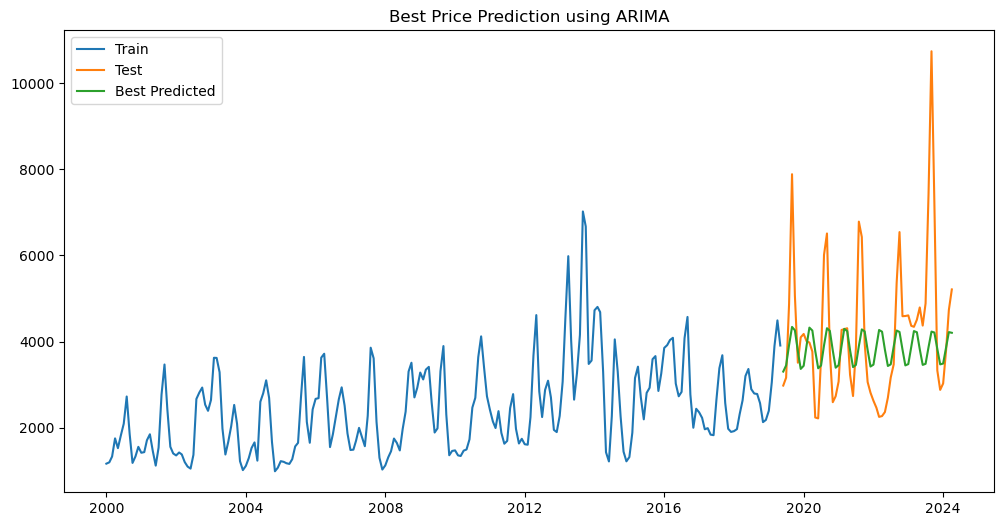

Best Mean Absolute Error:  1071.2389835461618
Best Root Mean Squared Error:  1539.1726410824774


In [37]:

import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

p = q = range(0, 4)
d = 1
pdq = list(itertools.product(p, [d], q))

lowest_aic = float('inf')
best_pdq = None
best_model = None

warnings.filterwarnings("ignore")

for param in pdq:
    try:
        temp_model = ARIMA(train, order=param)
        results = temp_model.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        
        if results.aic < lowest_aic:
            lowest_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print("Best ARIMA{} - AIC:{}".format(best_pdq, lowest_aic))

# 최적의 모델을 사용하여 예측
best_predictions = best_model.forecast(steps=len(test))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, best_predictions, label='Best Predicted')
plt.legend()
plt.title('Best Price Prediction using ARIMA')
plt.show()

# 정확도 평가
best_mae = mean_absolute_error(test, best_predictions)
best_rmse = sqrt(mean_squared_error(test, best_predictions))

print("Best Mean Absolute Error: ", best_mae)
print("Best Root Mean Squared Error: ", best_rmse)


In [ ]:
잔차가 조금 더 줄음 이제 계절 arima즉 sarimafh 로 시도 

                                     SARIMAX Results                                      
Dep. Variable:                                 가격   No. Observations:                  233
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1704.970
Date:                            Thu, 06 Jun 2024   AIC                           3419.939
Time:                                    11:35:59   BIC                           3436.908
Sample:                                01-01-2000   HQIC                          3426.792
                                     - 05-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3200      0.128     -2.510      0.012      -0.570      -0.070
ma.L1          0.7155      0.099   

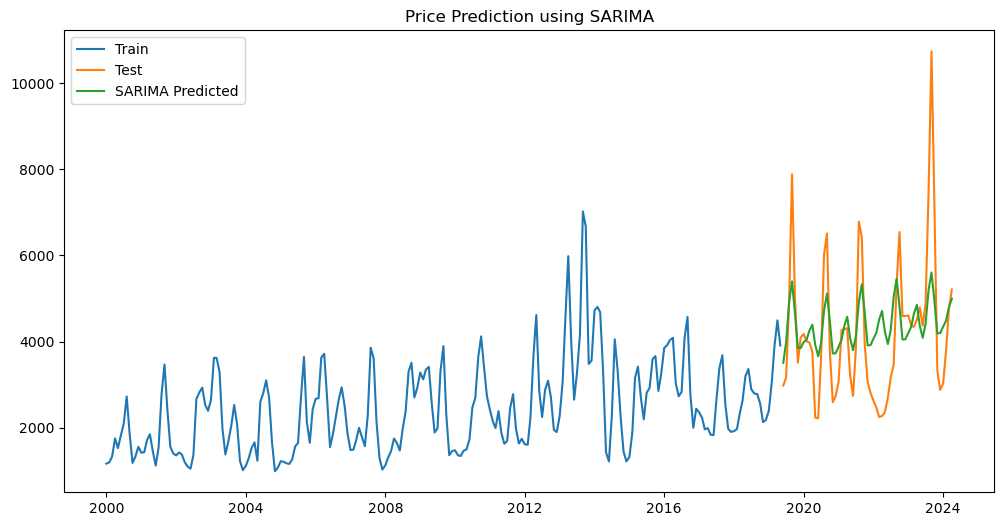

SARIMA Mean Absolute Error:  968.7712182043036
SARIMA Root Mean Squared Error:  1301.7250893821097


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA 모델 적합
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# 요약 정보 출력
print(sarima_result.summary())

# 예측ㅁ
sarima_predictions = sarima_result.get_forecast(steps=len(test))
sarima_predicted_mean = sarima_predictions.predicted_mean

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, sarima_predicted_mean, label='SARIMA Predicted')
plt.legend()
plt.title('Price Prediction using SARIMA')
plt.show()

# 정확도 평가
sarima_mae = mean_absolute_error(test, sarima_predicted_mean)
sarima_rmse = sqrt(mean_squared_error(test, sarima_predicted_mean))

print("SARIMA Mean Absolute Error: ", sarima_mae)
print("SARIMA Root Mean Squared Error: ", sarima_rmse)


                                     SARIMAX Results                                      
Dep. Variable:                                 가격   No. Observations:                  233
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1704.970
Date:                            Thu, 06 Jun 2024   AIC                           3419.939
Time:                                    11:36:03   BIC                           3436.908
Sample:                                01-01-2000   HQIC                          3426.792
                                     - 05-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3200      0.128     -2.510      0.012      -0.570      -0.070
ma.L1          0.7155      0.099   

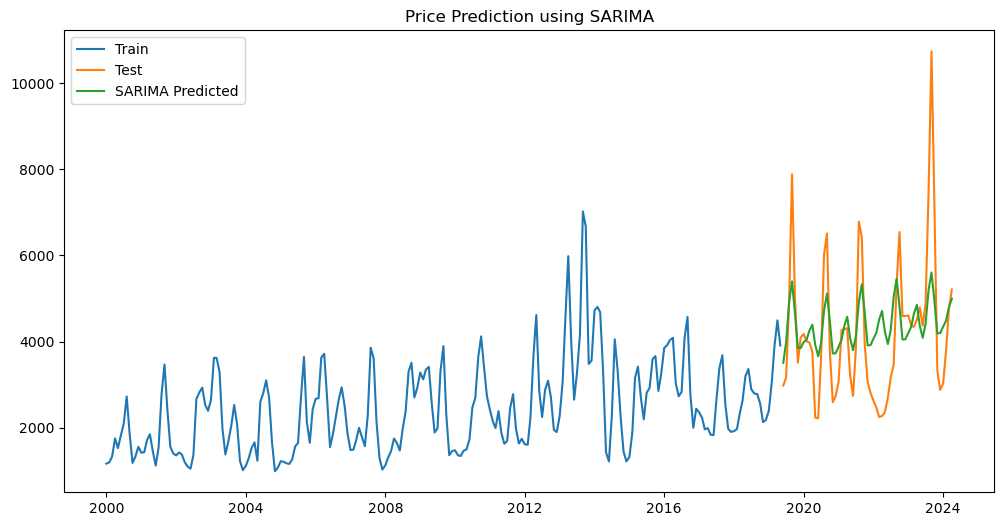

SARIMA Mean Absolute Error:  968.7712182043036
SARIMA Root Mean Squared Error:  1301.7250893821097
Predicted price for May 2024: 2024-05-01    4512.375747
Freq: MS, Name: predicted_mean, dtype: float64


ConversionError: Failed to convert value(s) to axis units: '2024-05'

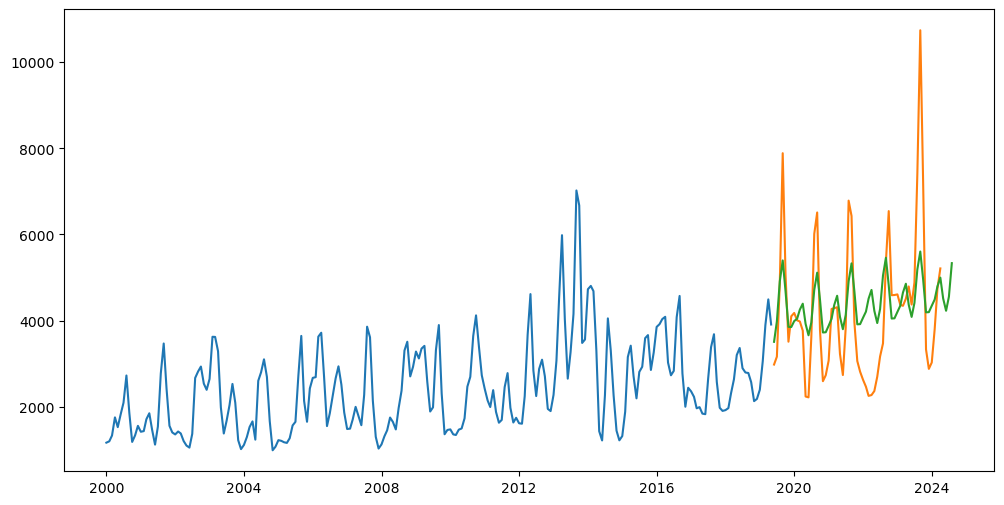

In [39]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# SARIMA 모델 적합
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# 요약 정보 출력
print(sarima_result.summary())

# 테스트 데이터셋에 대한 예측
sarima_predictions = sarima_result.get_forecast(steps=len(test))
sarima_predicted_mean = sarima_predictions.predicted_mean

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, sarima_predicted_mean, label='SARIMA Predicted')
plt.legend()
plt.title('Price Prediction using SARIMA')
plt.show()

# 정확도 평가
sarima_mae = mean_absolute_error(test, sarima_predicted_mean)
sarima_rmse = sqrt(mean_squared_error(test, sarima_predicted_mean))

print("SARIMA Mean Absolute Error: ", sarima_mae)
print("SARIMA Root Mean Squared Error: ", sarima_rmse)

# 2024년 5월 가격 예측
forecast_steps = len(test) + 4  # 테스트 데이터 길이 + 4개월 (2024년 1월부터 4월까지) 이후 5월 예측
future_predictions = sarima_result.get_forecast(steps=forecast_steps)
future_predicted_mean = future_predictions.predicted_mean

# 2024년 5월 가격 예측 값 출력
forecast_date = '2024-05'
forecast_value = future_predicted_mean.loc[forecast_date]
print(f"Predicted price for May 2024: {forecast_value}")

# 2024년 5월까지의 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(future_predicted_mean.index, future_predicted_mean, label='Future Predicted')
plt.axvline(x=forecast_date, color='r', linestyle='--', label='May 2024')
plt.legend()
plt.title('Price Prediction using SARIMA')
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                 가격   No. Observations:                  233
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1704.970
Date:                            Thu, 06 Jun 2024   AIC                           3419.939
Time:                                    11:36:14   BIC                           3436.908
Sample:                                01-01-2000   HQIC                          3426.792
                                     - 05-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3200      0.128     -2.510      0.012      -0.570      -0.070
ma.L1          0.7155      0.099   

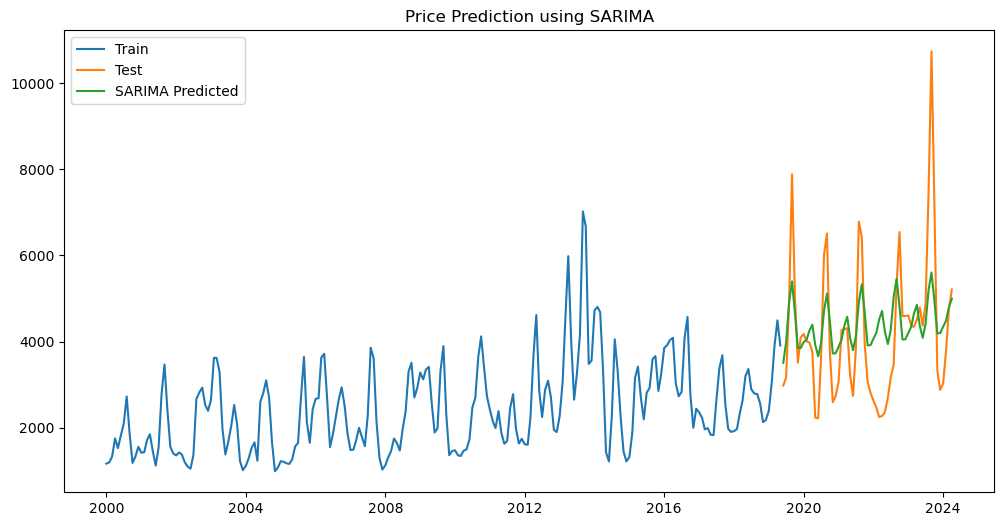

SARIMA Mean Absolute Error:  968.7712182043036
SARIMA Root Mean Squared Error:  1301.7250893821097
Predicted price for May 2024: 2024-05-01    4512.375747
Freq: MS, Name: predicted_mean, dtype: float64


ConversionError: Failed to convert value(s) to axis units: '2024-05'

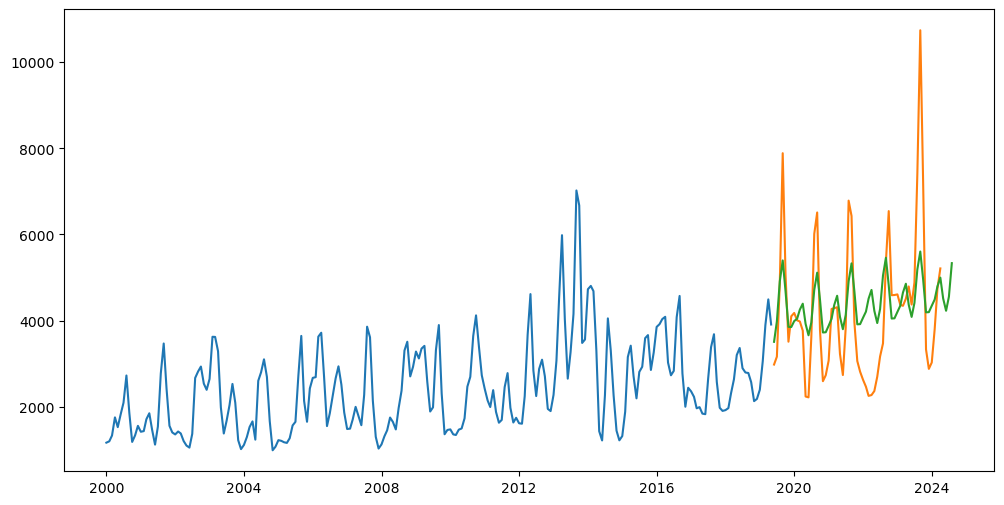

In [40]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# SARIMA 모델 적합
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# 요약 정보 출력
print(sarima_result.summary())

# 테스트 데이터셋에 대한 예측
sarima_predictions = sarima_result.get_forecast(steps=len(test))
sarima_predicted_mean = sarima_predictions.predicted_mean

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, sarima_predicted_mean, label='SARIMA Predicted')
plt.legend()
plt.title('Price Prediction using SARIMA')
plt.show()

# 정확도 평가
sarima_mae = mean_absolute_error(test, sarima_predicted_mean)
sarima_rmse = sqrt(mean_squared_error(test, sarima_predicted_mean))

print("SARIMA Mean Absolute Error: ", sarima_mae)
print("SARIMA Root Mean Squared Error: ", sarima_rmse)

# 2024년 5월 가격 예측
forecast_steps = len(test) + 4  # 테스트 데이터 길이 + 4개월 (2024년 1월부터 4월까지) 이후 5월 예측
future_predictions = sarima_result.get_forecast(steps=forecast_steps)
future_predicted_mean = future_predictions.predicted_mean

# 2024년 5월 가격 예측 값 출력
forecast_date = '2024-05'
forecast_value = future_predicted_mean.loc[forecast_date]
print(f"Predicted price for May 2024: {forecast_value}")

# 2024년 5월까지의 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(future_predicted_mean.index, future_predicted_mean, label='Future Predicted')
plt.axvline(x=forecast_date, color='r', linestyle='--', label='May 2024')
plt.legend()
plt.title('Price Prediction using SARIMA')
plt.show()

In [ ]:
이 값들은 이전 ARIMA 모델의 MAE와 RMSE에 비해 상당한 개선을 보여줍니다. 이는 SARIMA 모델이 계절적 변동성을 포함하여 예측의 정확도를 높인 결과로 볼 수 있습니다.

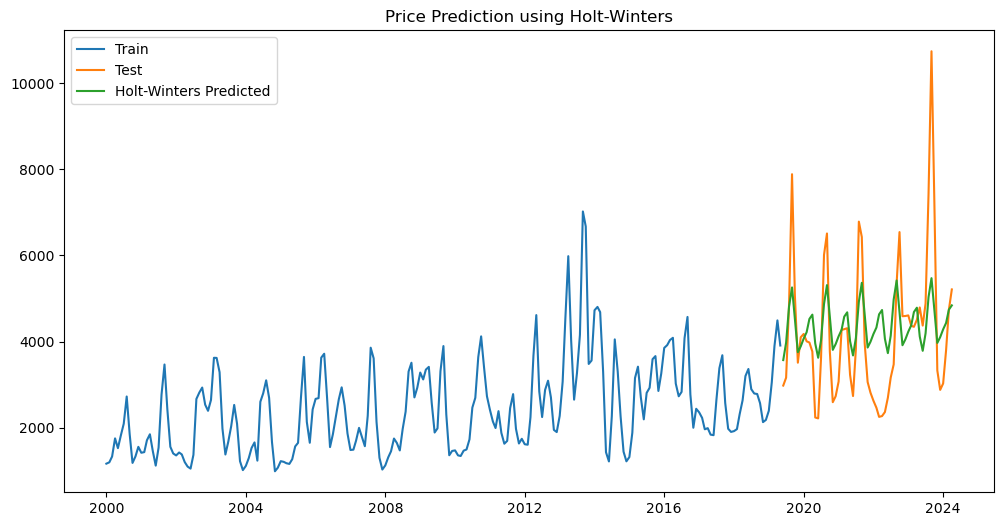

Holt-Winters Mean Absolute Error:  1000.3610297530552
Holt-Winters Root Mean Squared Error:  1334.9406010716914


In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 모델 적합
hw_model = ExponentialSmoothing(train, seasonal='additive', seasonal_periods=12, trend='additive').fit()

# 예측
hw_predictions = hw_model.forecast(steps=len(test))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, hw_predictions, label='Holt-Winters Predicted')
plt.legend()
plt.title('Price Prediction using Holt-Winters')
plt.show()

# 정확도 평가
hw_mae = mean_absolute_error(test, hw_predictions)
hw_rmse = sqrt(mean_squared_error(test, hw_predictions))

print("Holt-Winters Mean Absolute Error: ", hw_mae)
print("Holt-Winters Root Mean Squared Error: ", hw_rmse)
